<h1>Venda de jogos de videogame na História</h1>
<br>
Esta apresentação foi criada por <b>Paulo Henrique Vasconcellos</b>. Aqui eu irei realizar algumas análises sobre os dados encontrados <a href='https://www.kaggle.com/gregorut/videogamesales'>neste dataset</a>.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#Leitura do arquivo
videogames = pd.read_csv('vgsales.csv')

In [3]:
#Exibindo as 10 primeiras linhas do Dataframe
videogames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
#Resumo de informações em todas as colunas
videogames.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
#Tipo de dado em cada coluna
videogames.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
#Quantidade de linhas e colunas no Dataframe
videogames.shape

(16598, 11)

In [7]:
#Renomeando colunas
videogames.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano', 'Gênero',
                      'Editora','Vendas América do Norte','Vendas EUA',
                      'Vendas Japão', 'Outras vendas', 'Vendas Global']

In [8]:
#Exibindo as 10 primeiras linhas do arquivo
videogames.head(10)

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras vendas,Vendas Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [9]:
#Verificando linhas onde não há ano de lançamento definido
videogames[videogames['Ano'].isnull()].head()

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras vendas,Vendas Global
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [10]:
#Contagem de jogos lançados por plataforma
videogames['Plataforma'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Plataforma, dtype: int64

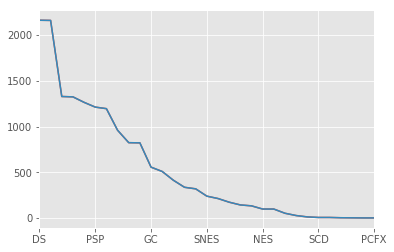

In [11]:
#Os dois pedaços de código abaixo fazem a mesma coisa
videogames['Plataforma'].value_counts().plot()

titulos_lancados = videogames['Plataforma'].value_counts()
titulos_lancados.plot()

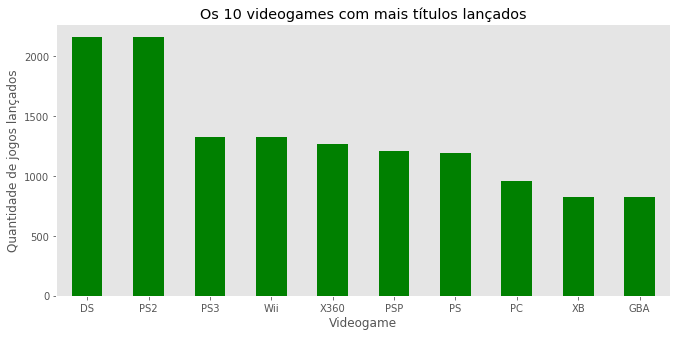

In [12]:
#Criando um gráfico utilizando apenas uma linha de código
videogames['Plataforma'].value_counts().head(10).plot(kind='bar', figsize=(11,5), grid=False, rot=0, color='green')

#Enfeitando o gráfico. Abaixo, definimos um título
plt.title('Os 10 videogames com mais títulos lançados')
plt.xlabel('Videogame') #eixo x
plt.ylabel('Quantidade de jogos lançados') #eixo y
plt.show()

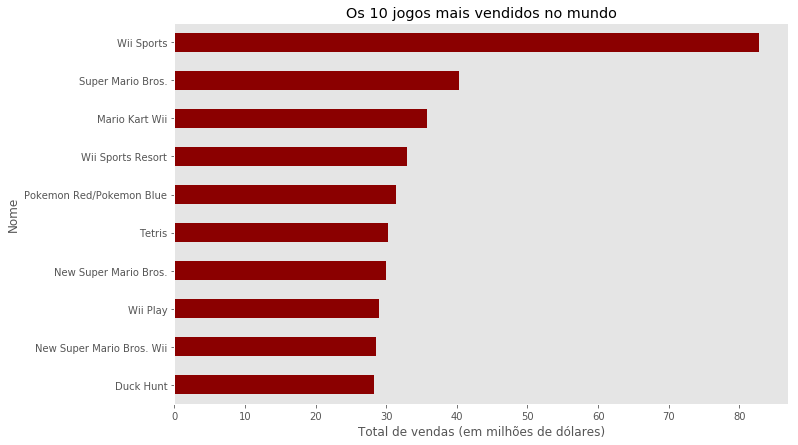

In [13]:
#Os 10 jogos mais vendidos da história
top_10_vendidos = videogames[['Nome','Vendas Global']].head(10).set_index('Nome').sort_values('Vendas Global', ascending=True)
top_10_vendidos.plot(kind='barh',figsize=(11,7), grid=False, color='darkred', legend=False)

plt.title('Os 10 jogos mais vendidos no mundo')
plt.xlabel('Total de vendas (em milhões de dólares)')
plt.show()

In [14]:
#Mapa de calor
crosstab_vg = pd.crosstab(videogames['Plataforma'], videogames['Gênero'])
crosstab_vg.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plataforma,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


In [15]:
#Adicionar coluna total
crosstab_vg['Total'] = crosstab_vg.sum(axis=1)
crosstab_vg.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Plataforma,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,182,37,14,53,28,20,11,86,7,30,26,15,509
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163


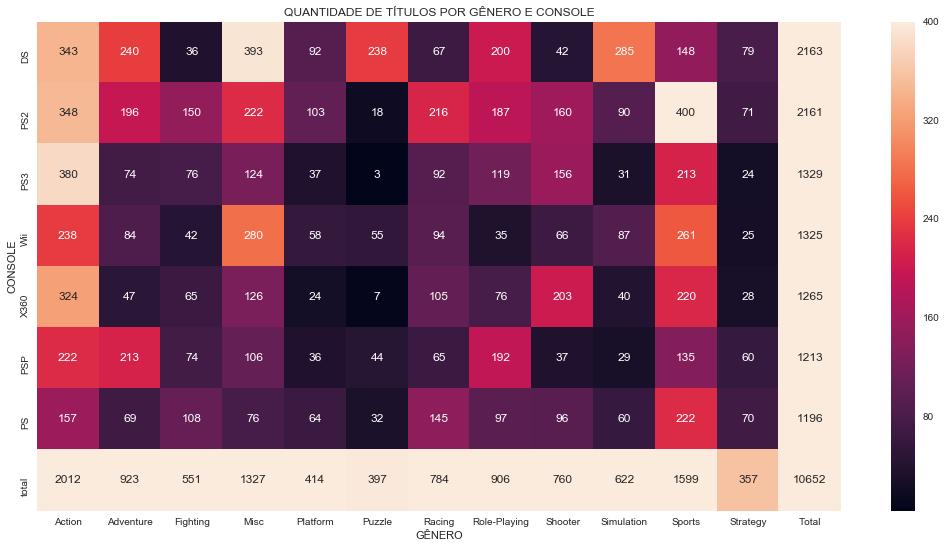

In [19]:
top10_platforms = crosstab_vg[crosstab_vg['Total'] > 1000].sort_values('Total', ascending = False)
top10_final = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns=['total']).T, ignore_index=False)

sns.set(font_scale=1)
plt.figure(figsize=(18, 9))
sns.heatmap(top10_final, annot=True, vmax=top10_final.loc[:'PS', :'Strategy'].values.max(), vmin=top10_final.loc[:, :'Strategy'].values.min(), fmt='d')
plt.xlabel('GÊNERO')
plt.ylabel('CONSOLE')
plt.title('QUANTIDADE DE TÍTULOS POR GÊNERO E CONSOLE')
plt.show()
